**Neste tutorial, a mensagem será enviada para diversos consumidores ao mesmo tempo. Esse método é chamado de publisher-subscriber. O mesmo é composto por um produtor, um buffer e os consumidores**

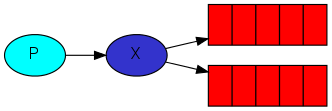

mais informacoes acesse: https://www.rabbitmq.com/tutorials/tutorial-three-python.html

In [ ]:
#!/usr/bin/env python
import pika
import sys

connection = pika.BlockingConnection(
    pika.ConnectionParameters(host='localhost'))
channel = connection.channel()

channel.exchange_declare(exchange='logs', exchange_type='fanout')

message = ' '.join(sys.argv[1:]) or "info: Hello World!"
channel.basic_publish(exchange='logs', routing_key='', body=message)
print(" [x] Sent %r" % message)
connection.close()

In [ ]:
#!/usr/bin/env python
import pika, sys, os

def main():
    connection = pika.BlockingConnection(
        pika.ConnectionParameters(host='localhost'))
    channel = connection.channel()

    channel.exchange_declare(exchange='logs', exchange_type='fanout')

    result = channel.queue_declare(queue='', exclusive=True)
    queue_name = result.method.queue

    channel.queue_bind(exchange='logs', queue=queue_name)

    def callback(ch, method, properties, body):
        print(" [x] %r" % body.decode())

    print(' [*] Waiting for logs. To exit press CTRL+C')
    channel.basic_consume(
        queue=queue_name, on_message_callback=callback, auto_ack=True)

    channel.start_consuming()


if __name__ == '__main__':
    try:
        main()
    except KeyboardInterrupt:
        print('Interrupted')
        try:
            sys.exit(0)
        except SystemExit:
            os._exit(0)

para ver as duas filas criadas execute o comando abaixo:

In [ ]:
!rabbitmqctl list_bindings